<AxesSubplot:title={'center':'NDAQ 2010-2021'}, xlabel='Date'>

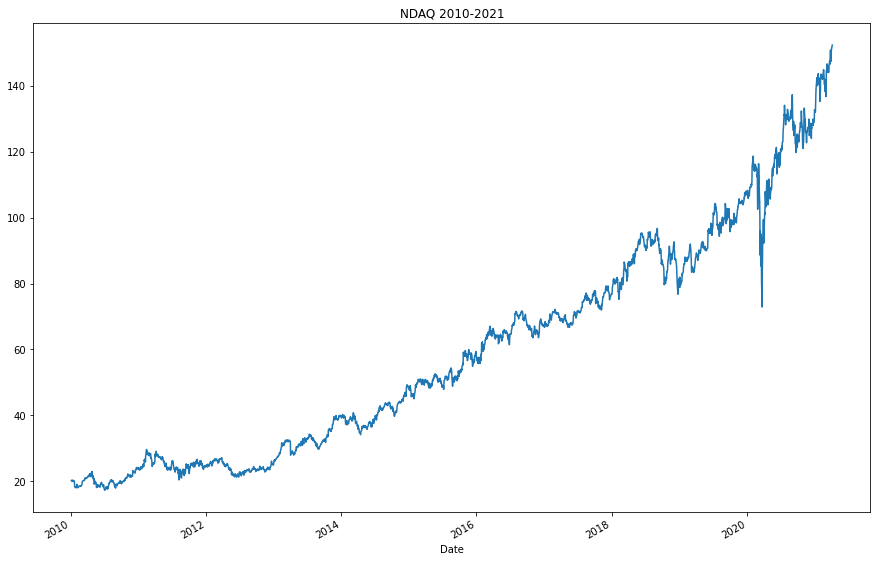

In [18]:
from pandas_datareader import DataReader # pip install pandas-datareader
from pandas_datareader import data
from datetime import datetime
from scipy.stats import skew
from sklearn.linear_model import LinearRegression

import numpy as np 
import seaborn as sns 
import pandas as pd
import plotly as ply

from scipy import stats

 
start = pd.to_datetime('2010-01-01') # in YYYY-MM-DD format
end = pd.to_datetime('today')
ts = data.DataReader('NDAQ', 'yahoo', start , end) # here 'yahoo' is the API to yahoo
ts.Close.plot(figsize=(15,10), title = "NDAQ 2010-2021")
#PLAIN DATA

In [19]:
#transformed data
boxCoxData, boxCox_lambda = stats.boxcox(ts.Close)
boxCoxSkew = skew(boxCoxData)

#we want to compare their absolute skewness 
if(boxCoxSkew < 0):
    boxCoxSkew = boxCoxSkew * -1

johnsonData, johnson_lambda = stats.yeojohnson(ts.Close)
johnsonSkew = skew(johnsonData)

if(johnsonSkew < 0):
    johnsonSkew = johnsonSkew * -1

#to show which is less skewed 
print(johnsonSkew)
print(boxCoxSkew)

0.014885017296142198
0.018633502520171354


In [20]:
#so we know what method was used, so we can reverse later. 
normaliseMethod = "neither"

if(johnsonSkew < boxCoxSkew):
    normalised_Data = johnsonData
    fitted_lambda = johnson_lambda
    normaliseMethod = "johnson"
    
#being == doesn't really matter same either way
elif(boxCoxSkew <= johnsonSkew):
    normalised_Data = boxCoxData
    fitted_lambda = boxCox_lambda
    normaliseMethod = "boxcox"

skew(normalised_Data)
#print(fitted_lambda)

-0.014885017296142198

In [21]:
#stuff happens to normalised Data turns into normalised_future_forcast or something else
normalised_future_forecast = normalised_Data

In [26]:
#Reverse Method

if(normaliseMethod == "johnson"):
    print("JOHNSON")
    index = 0;
    restored_Data = normalised_future_forecast
    for x in normalised_future_forecast:
    
        if x >= 0:
            positive = 1
        elif x < 0:
            positive = 0
        
   
    
        if (fitted_lambda != 0 and positive == 1):
        
            restored_Data[index] = (((fitted_lambda*x)+1)**(1/fitted_lambda)) - 1
            #print("First function")
        
        elif fitted_lambda == 0 and positive == 1:
    
            e = np.exp(1)
            restored_Data[index] = (e**x - 1)
            #print("Second function")
    
        elif fitted_lambda != 2 and positive == 0:
    
            restored_Data[index] = -((((-x*(2-fitted_lambda)) +1)**(1/(2-fitted_lambda))) -1)
            #print("Third Function")
    
        elif fitted_lambda == 2 and positive == 0:
    
            e = np.exp(1)
            restored_Data[index] = (-e**-x) + 1
            #print("Fourth function")
        
    
        index = index + 1
        



    
    
elif(normaliseMethod == "boxcox"):
    #print("BOXCOX")
    x = normalised_future_forecast   
    restoredData = inv_boxcox(x, fitted_lambda)


BOXCOX
